<a href="https://colab.research.google.com/github/AngelCBC/KNN-digit-classifier/blob/main/KNN_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import matplotlib as mpl

# Set up the environment.

np.random.seed(42)

# To plot pretty figures.
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset.

print("Downloading the MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape # 70000 images 28x28 pixels

((70000, 784), (70000,))

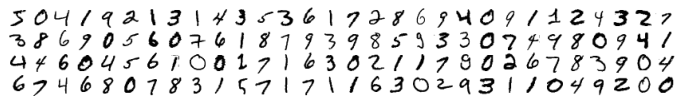

In [4]:
from math import ceil
import matplotlib.pyplot as plt


# Functions to plot the images.

def plot_digit(image_arr):
    image = image_arr.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

def plot_digits(images_arr, images_per_row, **options):
    pixels = 28
    images_per_row = min(len(images_arr), images_per_row)
    n_rows = ceil(len(images_arr) / images_per_row)
    # Fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(images_arr)
    images_arr = np.concatenate([images_arr, X[:n_empty]], axis=0)
    # Reshape the array:
    image_grid = images_arr.reshape((n_rows, images_per_row, pixels, pixels))
    # Combine the axis:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * pixels, 
                                                         images_per_row * pixels)
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(12, 9))
example_images = X[:120]
plot_digits(example_images, 30)
plt.show()

In [5]:
# Train and test data.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN model.
KNN_clf = KNeighborsClassifier()

# Grid Search for n_neighbors and weights.
param_grid = {
    "n_neighbors": np.arange(7, 18, 2), "weights": ["uniform", "distance"],}

grid_search = GridSearchCV(KNN_clf, param_grid, cv=3, return_train_score=True,
                           verbose=3)
# Fit the model.
grid_search.fit(X_train, y_train)

# Accuracy in the test set.
print("The accuracy obtained in the test set is:",grid_search.score(X_test, y_test))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END n_neighbors=7, weights=uniform;, score=(train=0.976, test=0.965) total time=  53.2s
[CV 2/3] END n_neighbors=7, weights=uniform;, score=(train=0.975, test=0.965) total time=  53.1s
[CV 3/3] END n_neighbors=7, weights=uniform;, score=(train=0.976, test=0.966) total time=  53.6s
[CV 1/3] END n_neighbors=7, weights=distance;, score=(train=1.000, test=0.967) total time=  52.4s
[CV 2/3] END n_neighbors=7, weights=distance;, score=(train=1.000, test=0.966) total time=  52.5s
[CV 3/3] END n_neighbors=7, weights=distance;, score=(train=1.000, test=0.967) total time=  53.1s
[CV 1/3] END n_neighbors=9, weights=uniform;, score=(train=0.973, test=0.964) total time=  52.8s
[CV 2/3] END n_neighbors=9, weights=uniform;, score=(train=0.973, test=0.963) total time=  53.1s
[CV 3/3] END n_neighbors=9, weights=uniform;, score=(train=0.974, test=0.965) total time=  53.7s
[CV 1/3] END n_neighbors=9, weights=distance;, score=(train=1.0